In [10]:
import numpy as np
import pandas as pd


In [11]:
house = pd.read_csv('/content/HousePricePrediction.csv')

In [12]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [13]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [14]:
house.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [15]:
house.corr()

<ipython-input-15-dea6bbb23e39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house.corr()


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.008931,-0.040746,-0.002839,-0.016581,-0.050438,0.018251,-0.024924,-0.021917
MSSubClass,0.008931,1.000000,-0.201730,-0.065625,0.034409,0.043315,-0.072530,-0.219965,-0.084284
LotArea,-0.040746,-0.201730,1.000000,-0.035617,0.024128,0.021612,0.084059,0.254138,0.263843
OverallCond,-0.002839,-0.065625,-0.035617,1.000000,-0.368477,0.047654,0.041501,-0.174002,-0.077856
YearBuilt,-0.016581,0.034409,0.024128,-0.368477,1.000000,0.612235,-0.027595,0.408515,0.522897
YearRemodAdd,-0.050438,0.043315,0.021612,0.047654,0.612235,1.000000,-0.062153,0.298107,0.507101
BsmtFinSF2,0.018251,-0.072530,0.084059,0.041501,-0.027595,-0.062153,1.000000,0.089410,-0.011378
TotalBsmtSF,-0.024924,-0.219965,0.254138,-0.174002,0.408515,0.298107,0.089410,1.000000,0.613581
SalePrice,-0.021917,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


In [16]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [17]:
house.shape

(2919, 13)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-19-0b1089815fc2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr())


<Axes: >

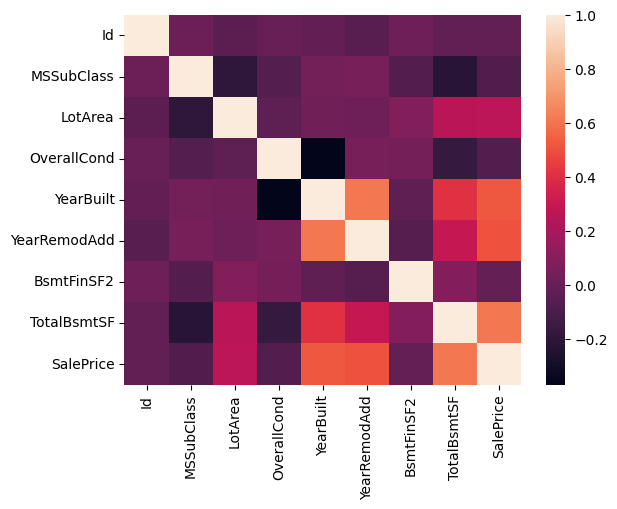

In [19]:
sns.heatmap(house.corr())

In [20]:
obj = (house.dtypes == 'object')
object_cols = list(obj[obj].index)
print(len(object_cols))


4


In [23]:
num = (house.dtypes == 'int')
num_cols = list(num[num].index)
print(len(num_cols))


6


In [22]:
fl = (house.dtypes == 'float')
fl_cols = list(fl[fl].index)
print(len(fl_cols))

3


<Axes: title={'center': 'Number of  Unique values of Categorical Features'}>

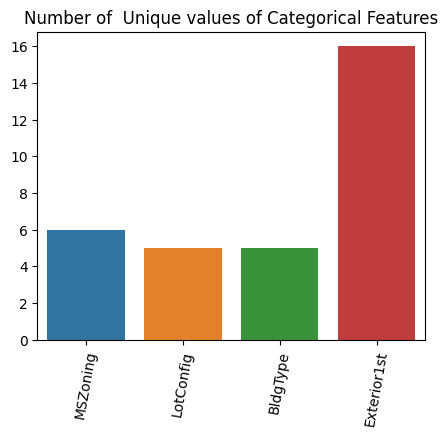

In [24]:
unique = []
for col in object_cols:
  unique.append(house[col].unique().size)
plt.figure(figsize=(5,4))
plt.title('Number of  Unique values of Categorical Features')
plt.xticks(rotation=80)
sns.barplot(x=object_cols,y=unique)

<ipython-input-25-45897198ceed>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, index)


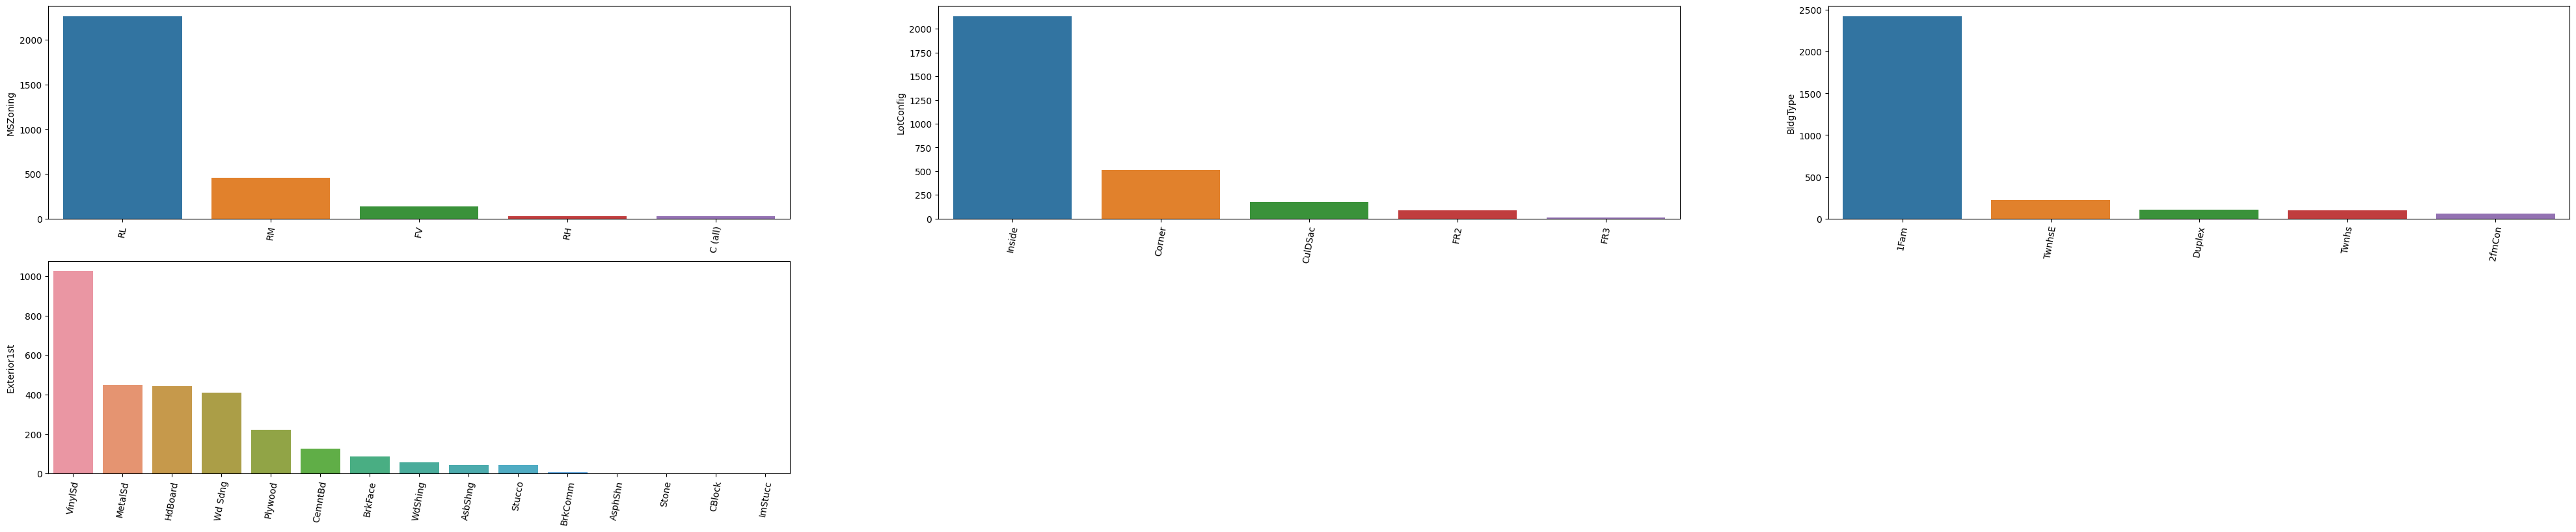

In [25]:
plt.figure(figsize=(50, 50))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=80)
index = 1

for col in object_cols:
	Y = house[col].value_counts()
	plt.subplot(10, 3, index)
	plt.xticks(rotation=80)
	sns.barplot(x=list(Y.index), y=Y)
	index += 1


In [26]:
new_dataset = house.dropna()

In [27]:
house['SalePrice'] = house['SalePrice'].fillna(
  house['SalePrice'].mean())

In [28]:
[feature + ": " + str(np.round(house[feature].isnull().mean() * 100, 2)) + "% missing values" 
 for feature in house.columns 
 if house[feature].isnull().sum() > 0]

['MSZoning: 0.14% missing values',
 'Exterior1st: 0.03% missing values',
 'BsmtFinSF2: 0.03% missing values',
 'TotalBsmtSF: 0.03% missing values']

In [ ]:
column_with_null = [feature for feature in house.columns if house[feature].isnull().sum()]
df_null = pd.DataFrame()
for feature in column_with_null:
    df_null[feature] = house[feature].copy()
    df_null[feature] = np.where(house[feature].isnull(), 1, 0)
df_null.head(3)

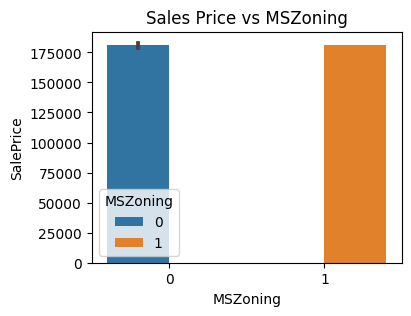

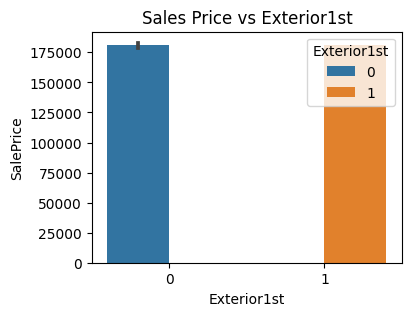

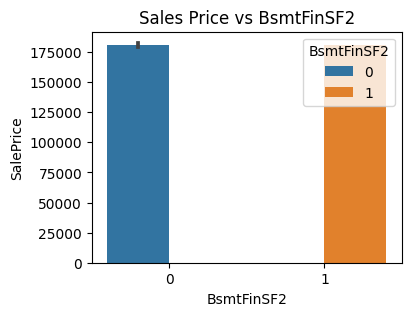

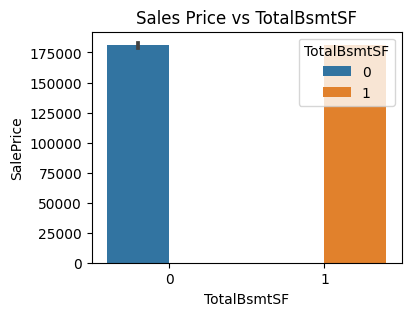

In [30]:
for feature in df_null.columns:
    
    plt.figure(figsize=(4,3))
    sns.barplot(x=df_null[feature], y=house['SalePrice'], hue=df_null[feature])
    plt.title('Sales Price vs ' + feature)
    plt.show()

In [31]:
year_features = [feature for feature in house.columns if 'Yr' in feature or 'Year' in feature]
for feature in year_features:
    print(feature, "=>", house[feature].unique())

YearBuilt => [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905
 1907 1896 1902 1895 1879 1901]
YearRemodAdd => [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

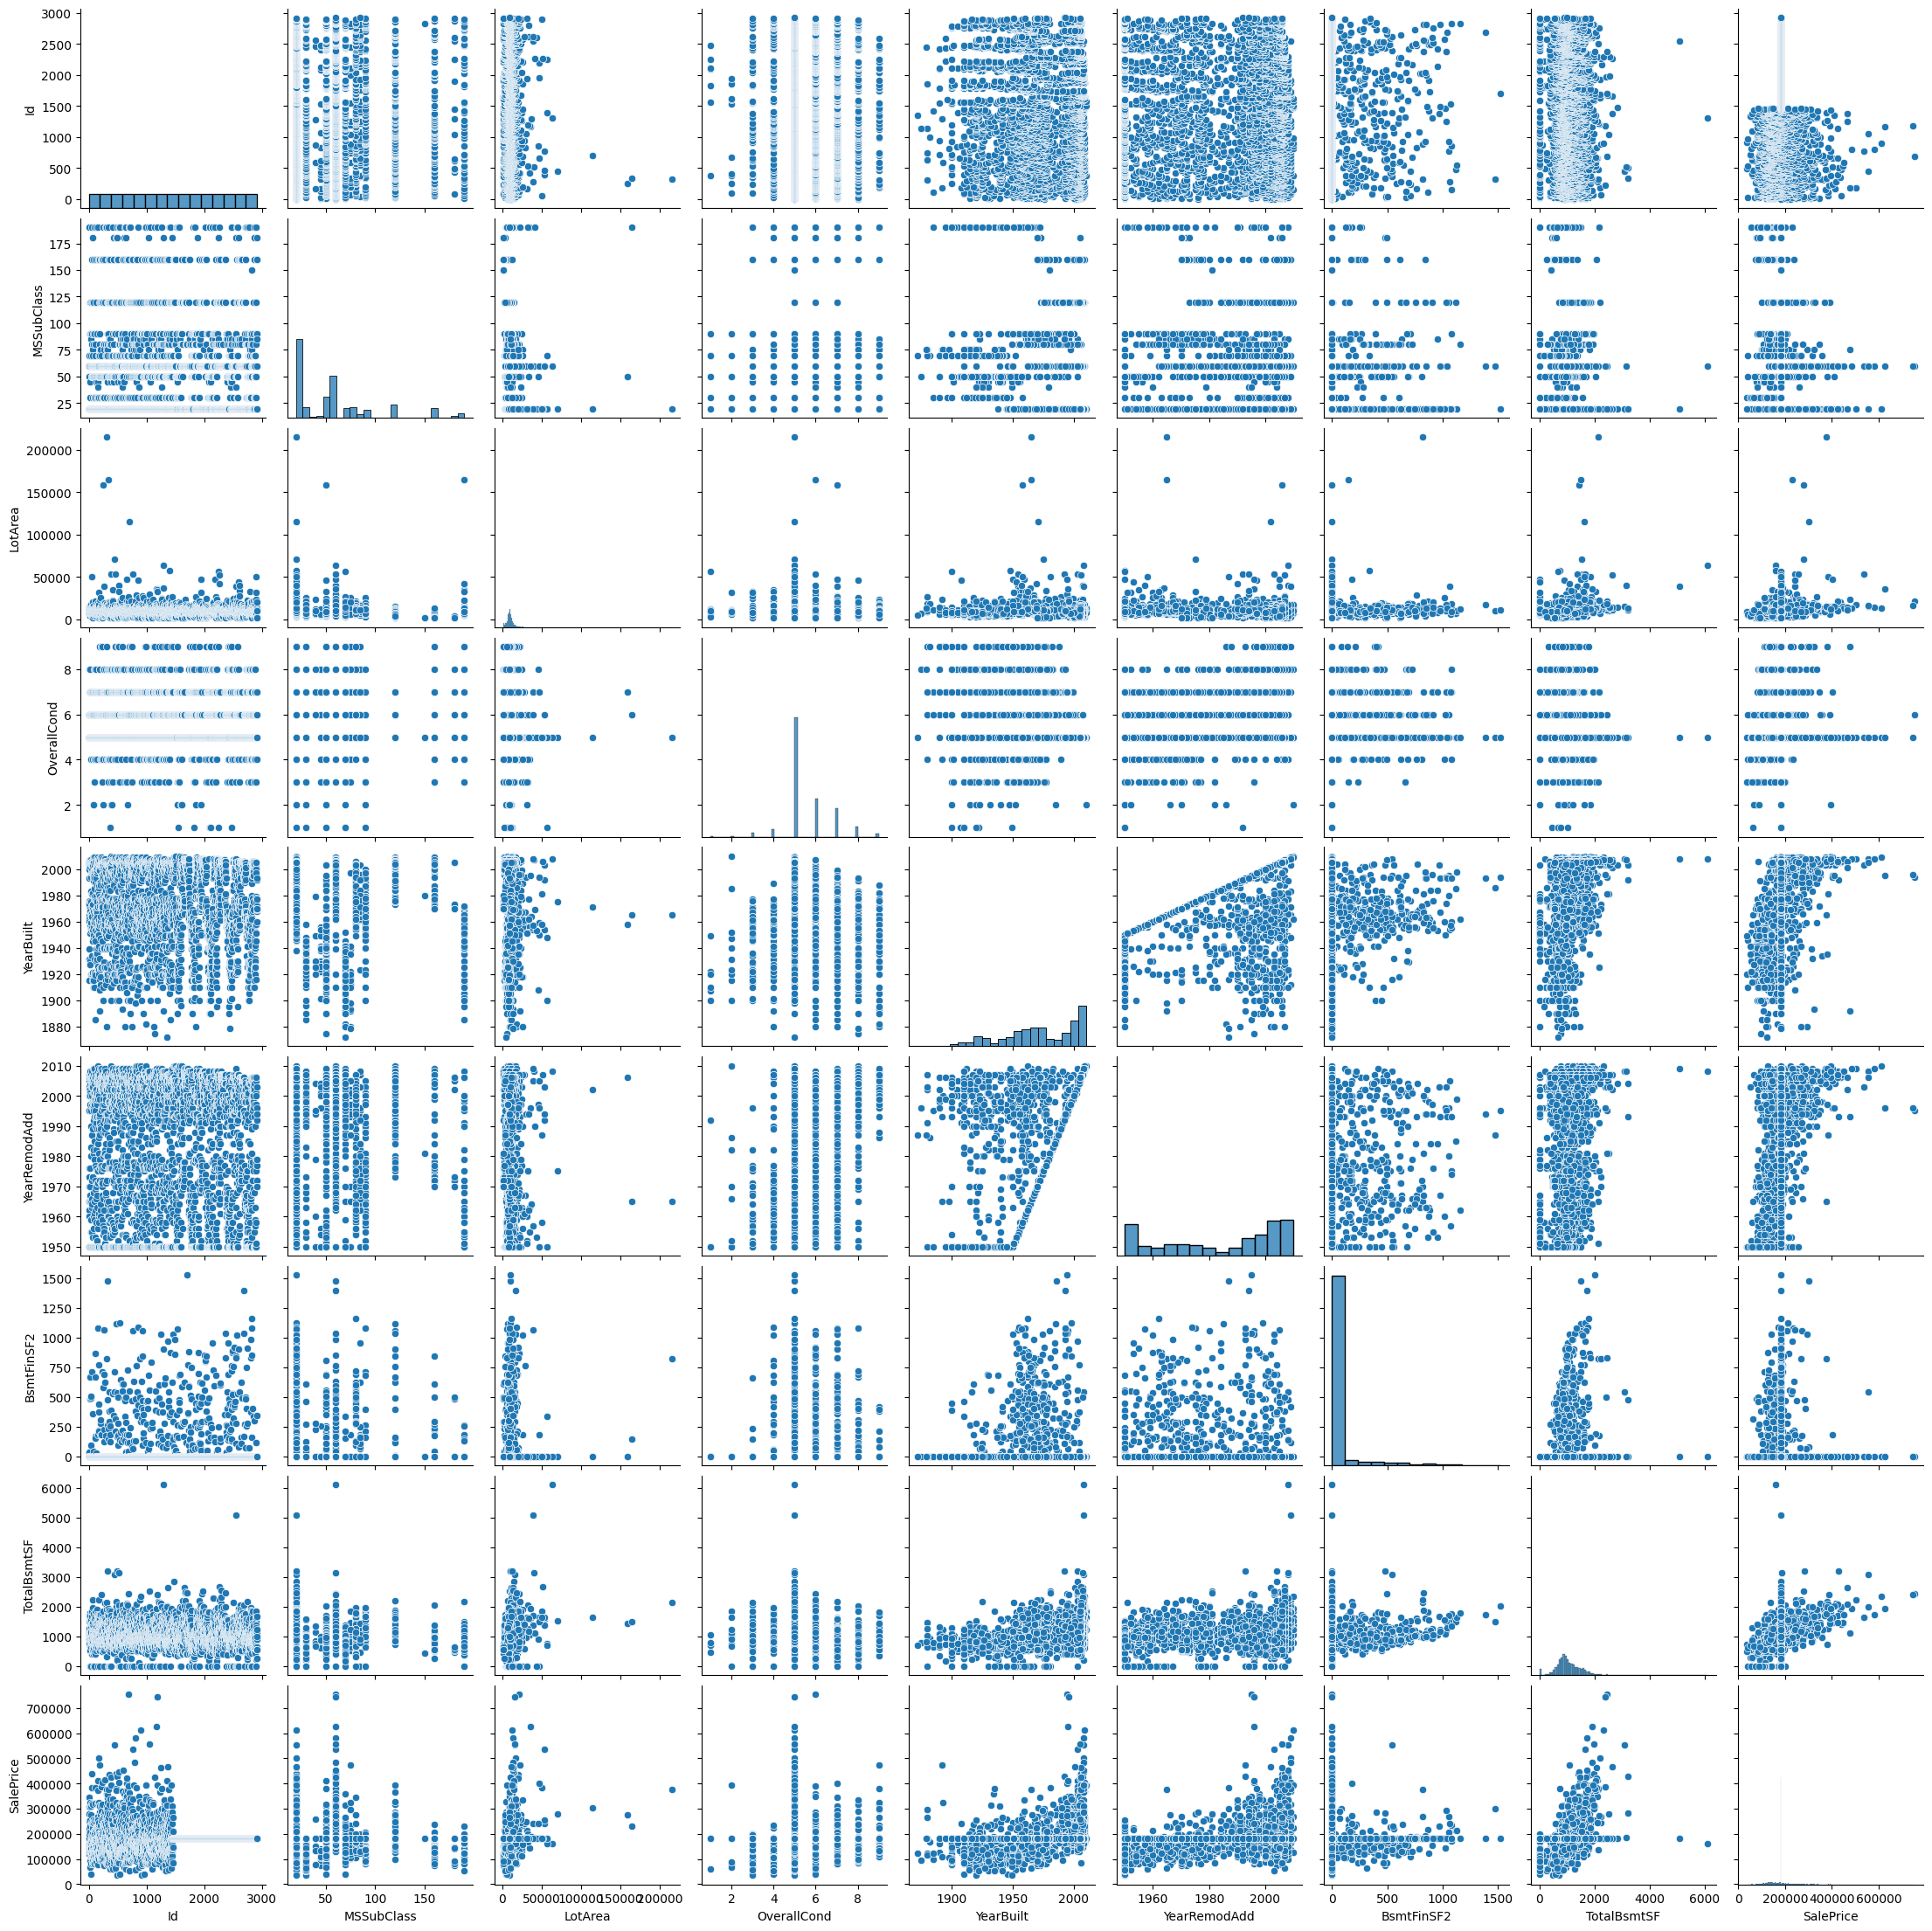

In [33]:
sns.pairplot(house)

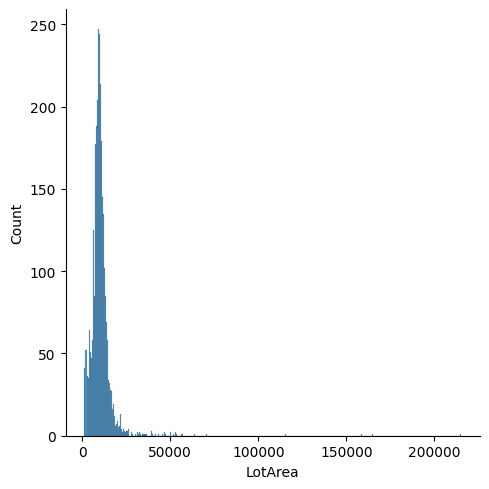

In [39]:
la = house['LotArea'].dropna()
sns.displot(la)
plt.show()

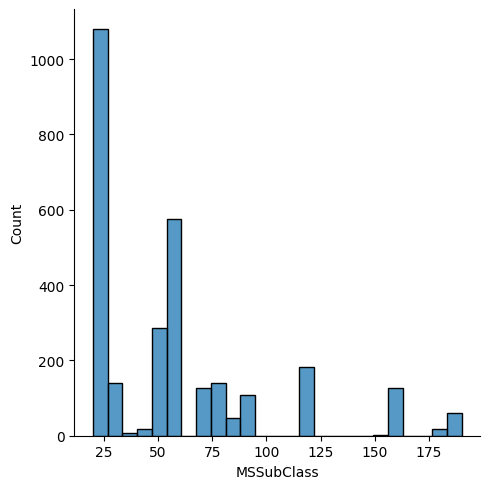

In [40]:
mss = house['MSSubClass'].dropna()
sns.displot(mss)
plt.show()

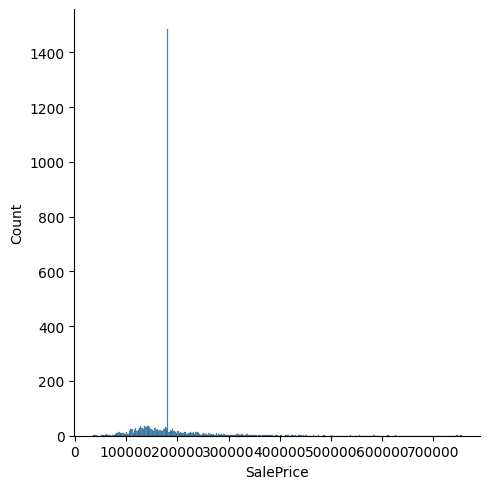

In [41]:
sp = house['SalePrice'].dropna()
sns.displot(sp)
plt.show()

In [35]:
from sklearn.preprocessing import OneHotEncoder 
t = (house.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [36]:
onehotencoder = OneHotEncoder(sparse=False)
onehotcols = pd.DataFrame(onehotencoder.fit_transform(house[object_cols]))
onehotcols.index = house.index
#onehotcols.columns = onehotencoder.get_feature_names()
data = house.drop(object_cols, axis=1)
data = pd.concat([data, onehotcols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
X = data.drop(['SalePrice'], axis=1)
Y = data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [38]:
print(X_train.shape)
print(Y_train.shape)

(2335, 40)
(2335,)
